In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gennet_inh_lat(input_neuron, compete_neuron):
  m11 = np.zeros((input_neuron, input_neuron))
  m12 = np.zeros((input_neuron, compete_neuron))

  m21 = 0.1 * np.ones((compete_neuron, input_neuron)) + 0.1 * np.random.rand(compete_neuron, input_neuron)
  # m22 = -(0.8. * (ones(compet_neuron, compet_neuron) - eye(compet_neuron, compet_neuron))); -> Inhibicao lateral sem autapse
  m22 = -(0.8 * (np.ones((compete_neuron, compete_neuron)) - np.eye(compete_neuron, compete_neuron))) # -> Inhibicao lateral sem autapse
  # m22 = -(0.8 * (np.ones((compete_neuron, compete_neuron)) - np.eye(compete_neuron))) + 0.6 * np.eye(compete_neuron) #Acrescenta autapse

  w = np.block([[m11, m12], [m21, m22]])

  m22 = np.zeros_like(m22)
  w_mask = np.block([[m11, m12], [m21, m22]])
  mask = w_mask > np.zeros_like(w_mask)

  return w, mask

In [3]:
def activation_function(activation, shift):
  return 1 / (1 + np.exp(-70 * (activation - shift)))

In [4]:
def increment_w(output, output_antes, mask, w):
  learning_factor = 0.001
  term_a = np.dot(output, output_antes.T)
  term_b = np.ones_like(output) * output_antes.T * w

  (learning_factor * (term_a - term_b)) * mask

  return (learning_factor * (term_a - term_b)) * mask


In [5]:
def calculation_shift(output, shift):
  displacement_speed = 0.025

  return (displacement_speed * output + shift) / (1 + displacement_speed)

In [6]:
def neural_network(w, mask, train_data):
  number_neurons = w.shape[0]
  shift = 0.5 * np.ones((number_neurons, 1))
  epochs = 1000
  incw = np.zeros_like(w)
  number_entries, patterns = train_data.shape
  camadas = 2
  activations = []

  for i in range(epochs):
    for j in range(patterns):
      output = np.zeros((number_neurons, 1))
      output_antes = output

      PAT = train_data[:, j]
      output[0:number_entries, 0] = PAT

      for k in range(camadas):
        w = w + incw
        inet = np.dot(w, output)

        output = activation_function(inet, shift)

        output = (inet > 0.0) * output
        
        activations.append(output.flatten().tolist())
        # output[0:number_entries, 0] = PAT

        shift = calculation_shift(output, shift)
        incw = increment_w(output, output_antes, mask, w)
        output_antes = output

  return activations

In [40]:
input_neuron = 5
compete_neuron = 3

w, mask = gennet_inh_lat(input_neuron, compete_neuron)

patterns = pd.read_csv('../dados/train.csv')
patterns = patterns.drop('tipo', axis=1).to_numpy().T

act = neural_network(w, mask, patterns)
df = pd.DataFrame(act)
df.tail(100)

,0,1,2,3,4,5,6,7
1900,0.0,0.0,0.0,0.0,0.0,0.462135,0.552225,0.574449
1901,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1902,0.0,0.0,0.0,0.0,0.0,0.462358,0.552474,0.574716
1903,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1904,0.0,0.0,0.0,0.0,0.0,0.462580,0.552723,0.574983
...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1996,0.0,0.0,0.0,0.0,0.0,0.472893,0.564273,0.587353
1997,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1998,0.0,0.0,0.0,0.0,0.0,0.473119,0.564526,0.587624


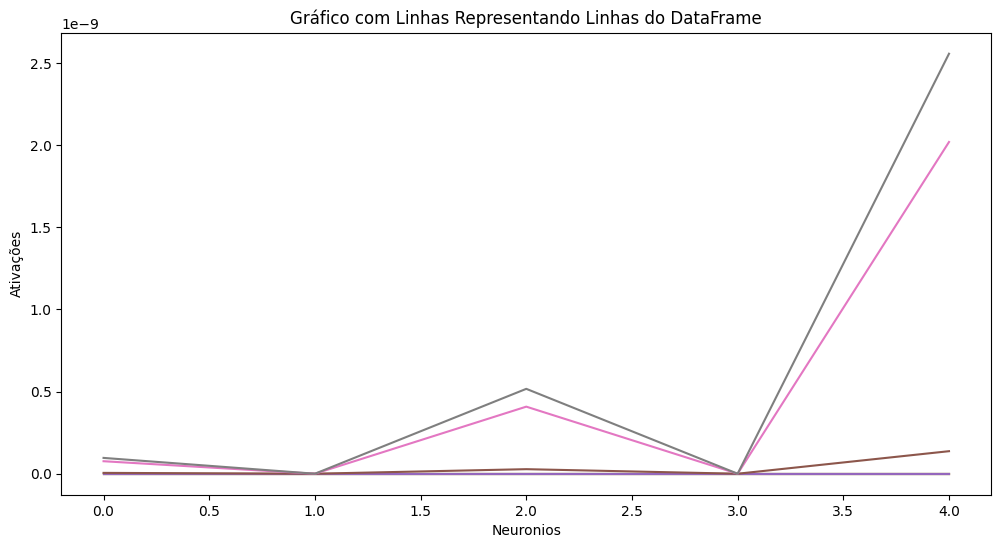

In [44]:
df_transposed = df.tail(100)

plt.figure(figsize=(12, 6))
for row in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[row], label=f"Linha {row+1}")

# Adicionando rótulos e título
plt.xlabel("Neuronios")
plt.ylabel("Ativações")
plt.title("Gráfico com Linhas Representando Linhas do DataFrame")
# plt.legend(loc='upper right')

# Exibindo o gráfico
plt.show()

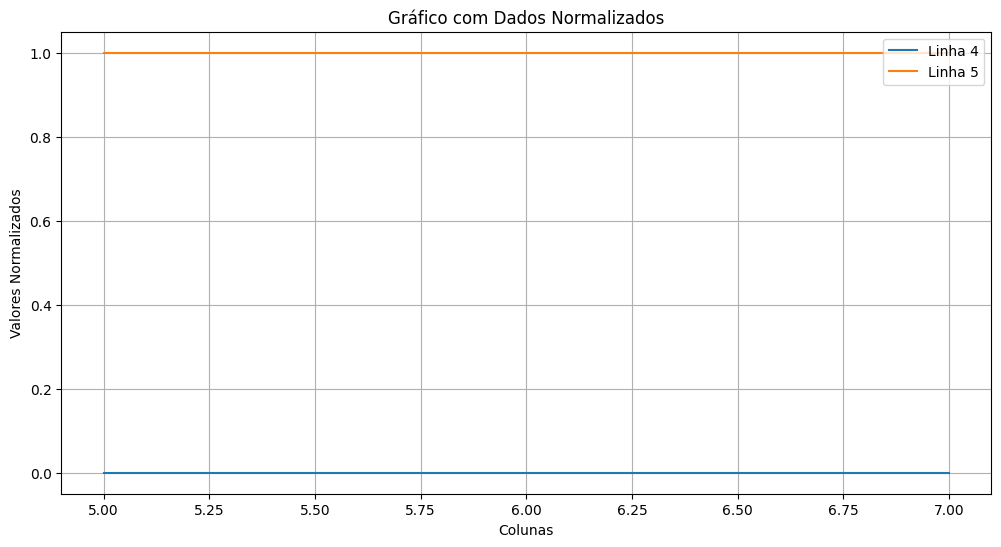

In [43]:
# Normalizando os dados no intervalo [0, 1]
df = df.head()
df_normalized = (df - df.min()) / (df.max() - df.min())

# Plotando novamente com os dados normalizados
df_transposed_normalized = df_normalized.tail(2).T

plt.figure(figsize=(12, 6))
for row in df_transposed_normalized.columns:
    plt.plot(df_transposed_normalized.index, df_transposed_normalized[row], label=f"Linha {row+1}")

# Adicionando rótulos e título
plt.xlabel("Colunas")
plt.ylabel("Valores Normalizados")
plt.title("Gráfico com Dados Normalizados")
plt.legend(loc='upper right')
plt.grid(True)

# Exibindo o gráfico
plt.show()